# Importing Libraries

In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 20)

# Data Exploration

In [3]:
set_1 = pd.read_csv("data/set1.csv")
set_2 = pd.read_csv("data/set2.csv")
set_3 = pd.read_csv("data/set3.csv")

### Set_1 exploration

In [4]:
set_1.head(5)

,date,open,high,low,close,volume,adjclose
0,2012-07-23,21.228571,21.639286,20.989643,21.565357,487975600,18.257217
1,2012-07-24,21.692142,21.774286,21.375357,21.461430,565132400,18.169228
2,2012-07-27,20.536072,20.922501,20.413929,20.898571,403936400,17.692717
3,2012-07-30,21.104286,21.408571,20.993570,21.251072,379142400,17.991146
4,2012-07-31,21.543928,21.846430,21.525715,21.812857,462327600,18.466757


In [5]:
set_1.tail(5)

,date,open,high,low,close,volume,adjclose
1525,2020-01-17,79.067497,79.684998,78.750000,79.682503,137816400,77.530296
1526,2020-01-21,79.297501,79.754997,79.000000,79.142502,110843200,77.004898
1527,2020-01-22,79.644997,79.997498,79.327499,79.425003,101832400,77.279770
1528,2020-01-23,79.480003,79.889999,78.912498,79.807503,104472000,77.651932
1529,2020-01-24,80.062500,80.832497,79.379997,79.577499,146537600,77.428162


In [6]:
set_1.shape

(1530, 7)

In [7]:
set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1530 non-null   object 
 1   open      1530 non-null   float64
 2   high      1530 non-null   float64
 3   low       1530 non-null   float64
 4   close     1530 non-null   float64
 5   volume    1530 non-null   int64  
 6   adjclose  1530 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 83.8+ KB


In [8]:
set_1.describe()

,open,high,low,close,volume,adjclose
count,1530.000000,1530.000000,1530.000000,1530.000000,1.530000e+03,1530.000000
mean,34.037337,34.339767,33.743013,34.049807,2.037577e+08,31.703129
std,13.026637,13.133565,12.935672,13.045243,1.557647e+08,13.217420
min,13.856071,14.271429,13.753571,13.947500,4.544800e+07,11.982236
25%,24.365001,24.630626,24.160625,24.357500,1.050149e+08,22.062594
50%,30.267499,30.562500,30.160001,30.438749,1.494268e+08,27.736906
75%,43.369376,43.725000,43.003751,43.306249,2.441639e+08,41.147334
max,80.062500,80.832497,79.379997,79.807503,1.460852e+09,77.651932


In [9]:
set_1.iloc[:,1:6].corr()

,open,high,low,close,volume
open,1.000000,0.999777,0.999707,0.999478,-0.546686
high,0.999777,1.000000,0.999643,0.999732,-0.543380
low,0.999707,0.999643,1.000000,0.999763,-0.552126
close,0.999478,0.999732,0.999763,1.000000,-0.548158
volume,-0.546686,-0.543380,-0.552126,-0.548158,1.000000


<Axes: >

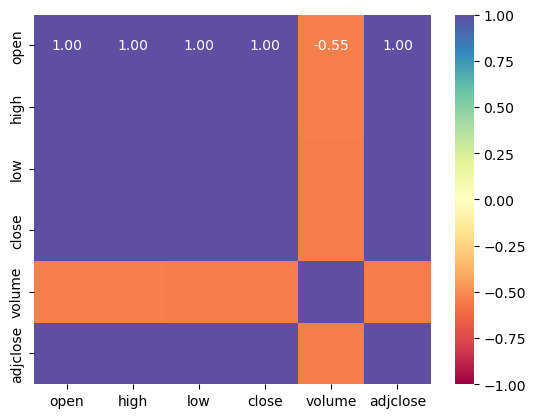

In [10]:
#correlation between various columns of the set 1
plt.figure()
sns.heatmap(set_1.iloc[:,1:].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

### Set_2 exploration

In [11]:
set_2.head(5)

,date,open,high,low,close,volume,adjclose,sentiment_bert
0,7/23/2012,21.228571,21.639286,20.989643,21.565357,487975600,18.257217,-1
1,7/24/2012,21.692142,21.774286,21.375357,21.461430,565132400,18.169228,1
2,7/27/2012,20.536072,20.922501,20.413929,20.898571,403936400,17.692717,0
3,7/30/2012,21.104286,21.408571,20.993570,21.251072,379142400,17.991146,0
4,7/31/2012,21.543928,21.846430,21.525715,21.812857,462327600,18.466757,-1


In [12]:
set_2.tail(3)

,date,open,high,low,close,volume,adjclose,sentiment_bert
1527,1/22/2020,79.644997,79.997498,79.327499,79.425003,101832400,77.279770,0
1528,1/23/2020,79.480003,79.889999,78.912498,79.807503,104472000,77.651932,-1
1529,1/24/2020,80.062500,80.832497,79.379997,79.577499,146537600,77.428162,1


In [13]:
set_2.shape

(1530, 8)

In [14]:
set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1530 non-null   object 
 1   open            1530 non-null   float64
 2   high            1530 non-null   float64
 3   low             1530 non-null   float64
 4   close           1530 non-null   float64
 5   volume          1530 non-null   int64  
 6   adjclose        1530 non-null   float64
 7   sentiment_bert  1530 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 95.8+ KB


In [15]:
set_2.describe()

,open,high,low,close,volume,adjclose,sentiment_bert
count,1530.000000,1530.000000,1530.000000,1530.000000,1.530000e+03,1530.000000,1530.000000
mean,34.037337,34.339767,33.743013,34.049807,2.037577e+08,31.703129,-0.103922
std,13.026637,13.133565,12.935672,13.045243,1.557647e+08,13.217420,0.814549
min,13.856071,14.271429,13.753571,13.947500,4.544800e+07,11.982236,-1.000000
25%,24.365001,24.630626,24.160625,24.357500,1.050149e+08,22.062594,-1.000000
50%,30.267499,30.562500,30.160001,30.438749,1.494268e+08,27.736906,0.000000
75%,43.369376,43.725000,43.003751,43.306249,2.441639e+08,41.147334,1.000000
max,80.062500,80.832497,79.379997,79.807503,1.460852e+09,77.651932,1.000000


In [16]:
set_2.iloc[:,1:].corr()

,open,high,low,close,volume,adjclose,sentiment_bert
open,1.000000,0.999777,0.999707,0.999478,-0.546686,0.998996,-0.039807
high,0.999777,1.000000,0.999643,0.999732,-0.543380,0.999268,-0.040068
low,0.999707,0.999643,1.000000,0.999763,-0.552126,0.999264,-0.039202
close,0.999478,0.999732,0.999763,1.000000,-0.548158,0.999493,-0.040090
volume,-0.546686,-0.543380,-0.552126,-0.548158,1.000000,-0.551160,-0.008124
adjclose,0.998996,0.999268,0.999264,0.999493,-0.551160,1.000000,-0.041129
sentiment_bert,-0.039807,-0.040068,-0.039202,-0.040090,-0.008124,-0.041129,1.000000


<Axes: >

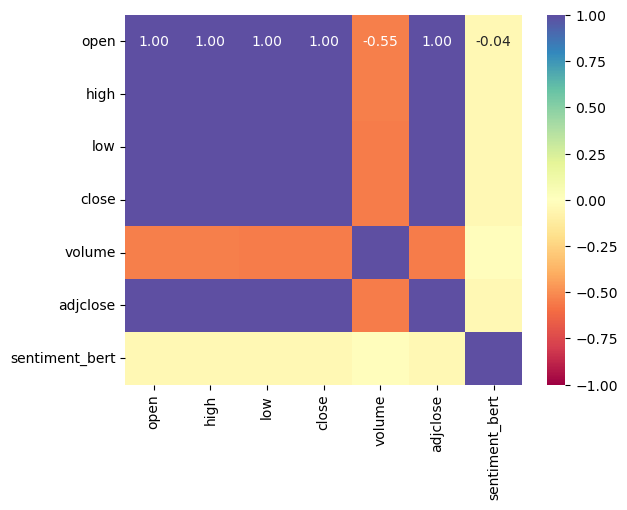

In [17]:
#correlation between various columns of the set 2
plt.figure()
sns.heatmap(set_2.iloc[:,1:].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

### Set_3 exploration

In [18]:
set_3.head(5)

,date,open,high,low,close,volume,adjclose,sentiment_bert,yield_rate,vix_close,cpi
0,2012-07-23,21.228571,21.639286,20.989643,21.565357,487975600,18.257217,-1,1.47,18.620001,228.59
1,2012-07-24,21.692142,21.774286,21.375357,21.461430,565132400,18.169228,1,1.44,20.469999,228.59
2,2012-07-27,20.536072,20.922501,20.413929,20.898571,403936400,17.692717,0,1.58,16.700001,228.59
3,2012-07-30,21.104286,21.408571,20.993570,21.251072,379142400,17.991146,0,1.53,18.030001,228.59
4,2012-07-31,21.543928,21.846430,21.525715,21.812857,462327600,18.466757,-1,1.51,18.930000,228.59


In [19]:
set_3.tail(5)

,date,open,high,low,close,volume,adjclose,sentiment_bert,yield_rate,vix_close,cpi
1510,2020-01-16,78.397499,78.925003,78.022499,78.809998,108829200,76.681351,-1,1.81,12.32,258.906
1511,2020-01-17,79.067497,79.684998,78.750000,79.682503,137816400,77.530296,0,1.84,12.10,258.906
1512,2020-01-21,79.297501,79.754997,79.000000,79.142502,110843200,77.004898,0,1.78,12.85,258.906
1513,2020-01-22,79.644997,79.997498,79.327499,79.425003,101832400,77.279770,0,1.77,12.91,258.906
1514,2020-01-23,79.480003,79.889999,78.912498,79.807503,104472000,77.651932,-1,1.74,12.98,258.906


In [20]:
set_3.shape

(1515, 11)

In [21]:
set_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1515 non-null   object 
 1   open            1515 non-null   float64
 2   high            1515 non-null   float64
 3   low             1515 non-null   float64
 4   close           1515 non-null   float64
 5   volume          1515 non-null   int64  
 6   adjclose        1515 non-null   float64
 7   sentiment_bert  1515 non-null   int64  
 8   yield_rate      1515 non-null   float64
 9   vix_close       1515 non-null   float64
 10  cpi             1515 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 130.3+ KB


In [22]:
set_3.describe()

,open,high,low,close,volume,adjclose,sentiment_bert,yield_rate,vix_close,cpi
count,1515.000000,1515.000000,1515.000000,1515.000000,1.515000e+03,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000
mean,34.009363,34.311245,33.715418,34.022289,2.036633e+08,31.676179,-0.106931,2.286924,14.961056,242.822605
std,12.952308,13.057015,12.861292,12.970698,1.557923e+08,13.142093,0.814611,0.427711,3.864569,8.055356
min,13.856071,14.271429,13.753571,13.947500,4.544800e+07,11.982236,-1.000000,1.380000,9.150000,228.590000
25%,24.377501,24.641250,24.161250,24.360000,1.048640e+08,22.065410,-1.000000,1.920000,12.485000,236.918000
50%,30.462500,30.642500,30.227501,30.487499,1.494288e+08,27.799915,0.000000,2.290000,13.950000,240.545000
75%,43.356251,43.711250,42.995001,43.286249,2.443234e+08,41.136133,1.000000,2.620000,16.410000,250.792000
max,79.644997,79.997498,79.327499,79.807503,1.460852e+09,77.651932,1.000000,3.230000,40.740002,258.906000


In [23]:
set_3.iloc[:,1:].corr()

,open,high,low,close,volume,adjclose,sentiment_bert,yield_rate,vix_close,cpi
open,1.000000,0.999774,0.999703,0.999474,-0.548822,0.998989,-0.040553,0.173933,-0.072283,0.931672
high,0.999774,1.000000,0.999637,0.999730,-0.545452,0.999262,-0.040804,0.174746,-0.067204,0.932156
low,0.999703,0.999637,1.000000,0.999760,-0.554272,0.999256,-0.039958,0.173005,-0.080827,0.931490
close,0.999474,0.999730,0.999760,1.000000,-0.550187,0.999487,-0.040792,0.173437,-0.076808,0.931536
volume,-0.548822,-0.545452,-0.554272,-0.550187,1.000000,-0.553085,-0.010891,-0.149482,0.157504,-0.589371
adjclose,0.998989,0.999262,0.999256,0.999487,-0.553085,1.000000,-0.041716,0.172719,-0.072803,0.940928
sentiment_bert,-0.040553,-0.040804,-0.039958,-0.040792,-0.010891,-0.041716,1.000000,0.030676,0.034413,-0.046665
yield_rate,0.173933,0.174746,0.173005,0.173437,-0.149482,0.172719,0.030676,1.000000,-0.024396,0.248962
vix_close,-0.072283,-0.067204,-0.080827,-0.076808,0.157504,-0.072803,0.034413,-0.024396,1.000000,-0.022102
cpi,0.931672,0.932156,0.931490,0.931536,-0.589371,0.940928,-0.046665,0.248962,-0.022102,1.000000


<Axes: >

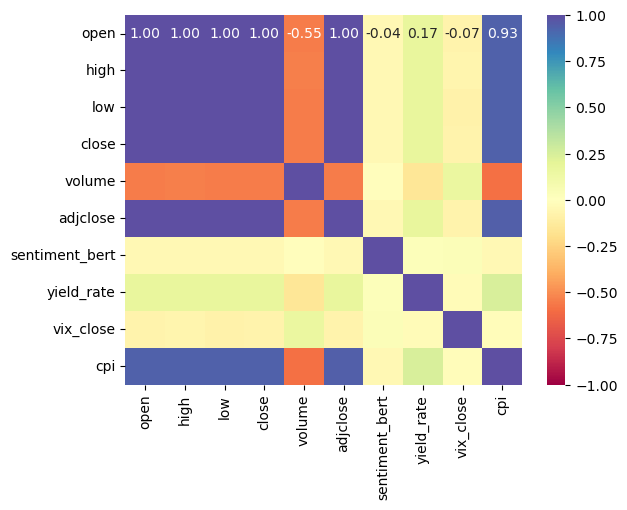

In [24]:
#correlation between various columns of the set 1
plt.figure()
sns.heatmap(set_3.iloc[:,1:].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

<Axes: >

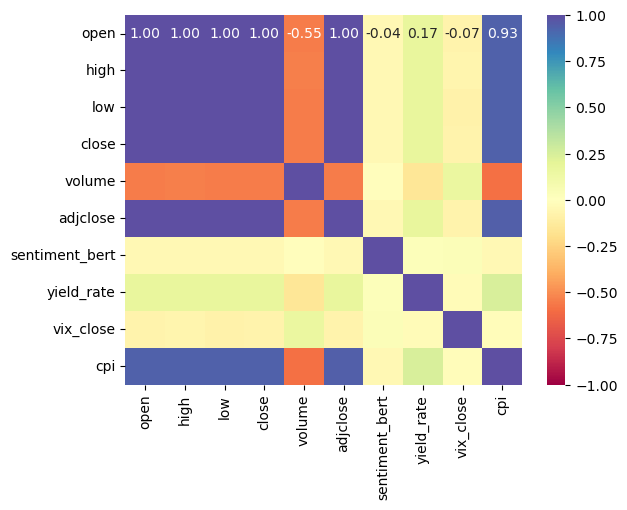

In [25]:
#correlation between various columns of the set 2
plt.figure()
sns.heatmap(set_3.iloc[:,1:].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

# Data Pre-processing

In [26]:
def preprocessing(data):

    data['date'] = pd.to_datetime(data['date'], dayfirst=True)

    print(data.info())
    print("data: \n", data.head(3))
    
    data['target'] = data['close'].shift(-1)

    print("data: \n", data.tail(3))

    data.dropna(inplace = True)

    print("data: \n", data.tail(3))

    return data

In [27]:
set_1_cleaned = preprocessing(set_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1530 non-null   datetime64[ns]
 1   open      1530 non-null   float64       
 2   high      1530 non-null   float64       
 3   low       1530 non-null   float64       
 4   close     1530 non-null   float64       
 5   volume    1530 non-null   int64         
 6   adjclose  1530 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 83.8 KB
None
data: 
         date       open       high        low      close     volume   adjclose
0 2012-07-23  21.228571  21.639286  20.989643  21.565357  487975600  18.257217
1 2012-07-24  21.692142  21.774286  21.375357  21.461430  565132400  18.169228
2 2012-07-27  20.536072  20.922501  20.413929  20.898571  403936400  17.692717
data: 
            date       open       high        low      close     volume  \

In [28]:
set_2_cleaned = preprocessing(set_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1530 non-null   datetime64[ns]
 1   open            1530 non-null   float64       
 2   high            1530 non-null   float64       
 3   low             1530 non-null   float64       
 4   close           1530 non-null   float64       
 5   volume          1530 non-null   int64         
 6   adjclose        1530 non-null   float64       
 7   sentiment_bert  1530 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 95.8 KB
None
data: 
         date       open       high        low      close     volume  \
0 2012-07-23  21.228571  21.639286  20.989643  21.565357  487975600   
1 2012-07-24  21.692142  21.774286  21.375357  21.461430  565132400   
2 2012-07-27  20.536072  20.922501  20.413929  20.898571  403936400   

    ad

In [29]:
set_3_cleaned = preprocessing(set_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1515 non-null   datetime64[ns]
 1   open            1515 non-null   float64       
 2   high            1515 non-null   float64       
 3   low             1515 non-null   float64       
 4   close           1515 non-null   float64       
 5   volume          1515 non-null   int64         
 6   adjclose        1515 non-null   float64       
 7   sentiment_bert  1515 non-null   int64         
 8   yield_rate      1515 non-null   float64       
 9   vix_close       1515 non-null   float64       
 10  cpi             1515 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 130.3 KB
None
data: 
         date       open       high        low      close     volume  \
0 2012-07-23  21.228571  21.639286  20.989643  21.565357  4879

# Modeling

In [30]:
#Show all messages, including ones pertaining to debugging
xgboost.set_config(verbosity=2)

def data_split(data, x_list, y, test_size):
    # splitting the data
    x = data.loc[:, x_list]
    y = data.loc[:, y]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1)
    
    print("x_train shape:", x_train.shape)
    print("x_train: \n", x_train.head(4))
    print("y_train shape:", y_train.shape)
    print("y_trean: \n", y_train.head(4))

    return x_train, x_test, y_train, y_test

def xgbregressor(x_train, x_test, y_train, y_test, n, obj):
    print("--------Started fitting XGB---------")
    
    #fit the model
    model = xgboost.XGBRegressor(objective = obj, n_estimators = n)
    model.fit(x_train,y_train)

    print("--------Model fit complete--------")
    
    #predict 
    y_predicted = model.predict(x_test)
    y_predicted_train = model.predict(x_train)
    
    #mse and rmse
    mse_test = mean_squared_error(y_test, y_predicted, squared=True)
    rmse_test = mean_squared_error(y_test, y_predicted, squared=False)
    mse_train = mean_squared_error(y_train, y_predicted_train, squared=True)
    rmse_train = mean_squared_error(y_train, y_predicted_train, squared=False)
    print("Mean Squared Error (Train):", mse_train)
    print("Root Mean Squared Error (Train):", rmse_train)
    print("Mean Squared Error (Test):", mse_test)
    print("Root Mean Squared Error (Test):", rmse_test)

    return y_predicted, mse_train, rmse_train, mse_test, rmse_test

### Set_1

In [31]:
#parameters which needs to be selected
data_set_selected = set_1_cleaned
test_size = 0.2
objective =  "reg:squarederror"
n = 20

#train-test split; model fitting; error calculation
training_parameters_list = [item for item in data_set_selected if item not in ['target', 'date']]
target_variable = ['target']
x_train, x_test, y_train, y_test = data_split(data_set_selected, training_parameters_list, target_variable, test_size)
y_predicted_1, mse_train_1, rmse_train_1, mse_test_1, rmse_test_1  = xgbregressor(x_train, x_test, y_train, y_test, n, objective)

x_train shape: (1223, 6)
x_train: 
            open       high        low      close     volume   adjclose
1260  51.075001  51.097500  49.542500  50.397499  264654800  48.142441
1294  38.959999  39.192501  37.517502  39.037498  212468400  37.420864
81    17.125357  17.227858  16.705000  16.710714  609053200  14.356099
725   24.632500  24.837500  24.620001  24.707500  126851600  22.724289
y_train shape: (1223, 1)
y_trean: 
          target
1260  50.942501
1294  39.057499
81    16.678928
725   24.334999
--------Started fitting XGB---------
--------Model fit complete--------
Mean Squared Error (Train): 0.13211914154400287
Root Mean Squared Error (Train): 0.3634819686642005
Mean Squared Error (Test): 0.7265081485559974
Root Mean Squared Error (Test): 0.8523544735355106


In [32]:
# # another way to split the data
# def train_test_split_for_timeseries(data, test_size):
#     data = data.values
#     n = int(len(data) * (1 - test_size))
#     print(n)
#     return data[:n], data[n:]

# train, test = train_test_split_for_timeseries(data['close'], test_size)

# x_train = train[:-1]
# y_train = test[-1]

# print("train size:", train.size)
# print("test size:", test.size)

### Set_2

In [33]:
print(set_2.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'sentiment_bert', 'target'],
      dtype='object')


In [34]:
#parameters which needs to be selected
data_set_selected = set_2_cleaned
test_size = 0.2
objective =  "reg:squarederror"
n = 20

#train-test split; model fitting; error calculation
training_parameters_list = [item for item in data_set_selected if item not in ['target', 'date']]
target_variable = ['target']
x_train, x_test, y_train, y_test = data_split(data_set_selected, training_parameters_list, target_variable, test_size)
y_predicted_2, mse_train_2, rmse_train_2, mse_test_2, rmse_test_2 = xgbregressor(x_train, x_test, y_train, y_test, n, objective)

x_train shape: (1223, 7)
x_train: 
            open       high        low      close     volume   adjclose  \
1260  51.075001  51.097500  49.542500  50.397499  264654800  48.142441   
1294  38.959999  39.192501  37.517502  39.037498  212468400  37.420864   
81    17.125357  17.227858  16.705000  16.710714  609053200  14.356099   
725   24.632500  24.837500  24.620001  24.707500  126851600  22.724289   

      sentiment_bert  
1260              -1  
1294              -1  
81                -1  
725               -1  
y_train shape: (1223, 1)
y_trean: 
          target
1260  50.942501
1294  39.057499
81    16.678928
725   24.334999
--------Started fitting XGB---------
--------Model fit complete--------
Mean Squared Error (Train): 0.1284651852873307
Root Mean Squared Error (Train): 0.3584204030009044
Mean Squared Error (Test): 0.753841919782938
Root Mean Squared Error (Test): 0.8682407038275377


### Set_3

In [35]:
print(set_3.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'sentiment_bert', 'yield_rate', 'vix_close', 'cpi', 'target'],
      dtype='object')


In [36]:
#parameters which needs to be selected
data_set_selected = set_3_cleaned
test_size = 0.2
objective =  "reg:squarederror"
n = 20

#train-test split; model fitting; error calculation
training_parameters_list = [item for item in data_set_selected if item not in ['target', 'date']]
target_variable = ['target']
x_train, x_test, y_train, y_test = data_split(data_set_selected, training_parameters_list, target_variable, test_size)
y_predicted_3, mse_train_3, rmse_train_3, mse_test_3, rmse_test_3 = xgbregressor(x_train, x_test, y_train, y_test, n, objective)

x_train shape: (1211, 10)
x_train: 
            open       high        low      close     volume   adjclose  \
1459  58.342499  58.810001  58.299999  58.592499   73903200  56.839302   
480   31.525000  32.532501  31.325001  32.237499  234050400  28.934084   
786   28.250000  28.295000  28.084999  28.272499   98429600  26.143999   
589   29.232500  29.825001  29.014999  29.817499  342205600  26.995495   

      sentiment_bert  yield_rate  vix_close      cpi  
1459               0        1.75      13.68  257.155  
480                0        2.12      12.70  237.001  
786               -1        1.56      13.10  241.176  
589               -1        2.10      14.33  237.733  
y_train shape: (1211, 1)
y_trean: 
          target
1459  58.820000
480   31.450001
786   28.487499
589   30.132500
--------Started fitting XGB---------
--------Model fit complete--------
Mean Squared Error (Train): 0.11150264821443683
Root Mean Squared Error (Train): 0.33392012250602215
Mean Squared Error (Test): 0

In [37]:
# def validate(data, prec):
#     predictions = []
#     train, test = train_test_split(data, prec)
#     history = [x for x in train]
#     for i in range(len(test)):
#         text_X, test_y = test[i, :-1], test[i, -1]
#         pred = xgb_predict(history, test_X[0])
#         predictions.append(pred)
#         history.append(test[i])
#     error = mean_squesred_error(test[:, -1], predictions, squared=False)
#     return error, test[:, -1], predictions

In [38]:
# %%time
# rmse, y, pred = validate(df, 0.2)
# print(rmse)

# Results